In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf
pd.options.mode.chained_assignment = None  # default='warn'

import glob
import os

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.770927
BICCN_mouse2,0.770927,1.000000


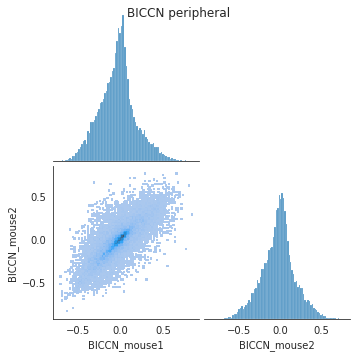

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.736745
BICCN_mouse2,0.736745,1.000000


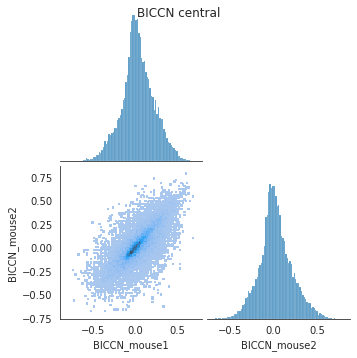

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.721453
BICCN_mouse2,0.721453,1.000000


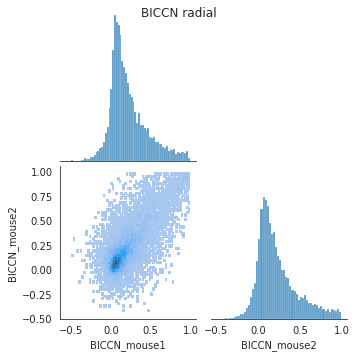

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.734906
BICCN_mouse2,0.734906,1.000000


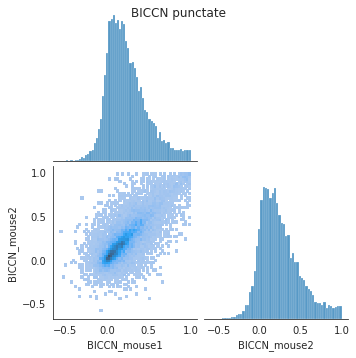

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.744148,0.750788
vz_Brainmap_slice2,0.744148,1.000000,0.755961
vz_Brainmap_slice3,0.750788,0.755961,1.000000


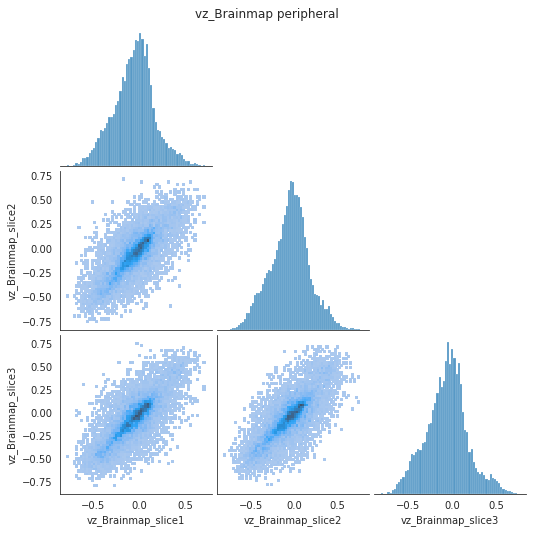

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.678930,0.693512
vz_Brainmap_slice2,0.678930,1.000000,0.713747
vz_Brainmap_slice3,0.693512,0.713747,1.000000


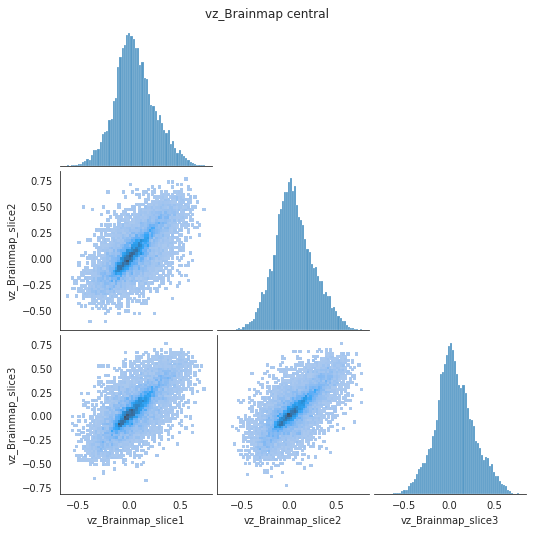

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.570699,0.519135
vz_Brainmap_slice2,0.570699,1.000000,0.527489
vz_Brainmap_slice3,0.519135,0.527489,1.000000


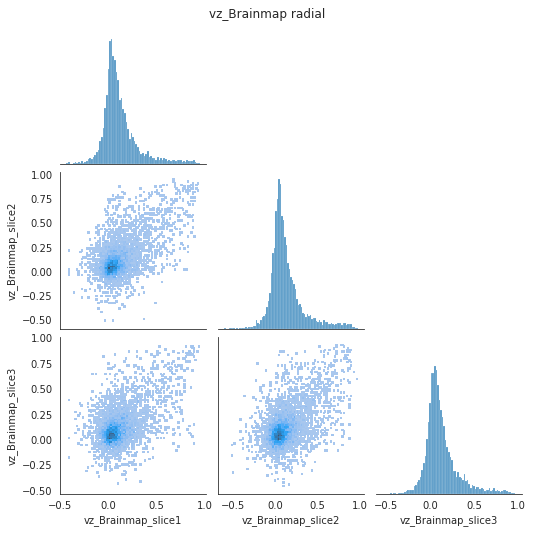

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.656219,0.618859
vz_Brainmap_slice2,0.656219,1.000000,0.620599
vz_Brainmap_slice3,0.618859,0.620599,1.000000


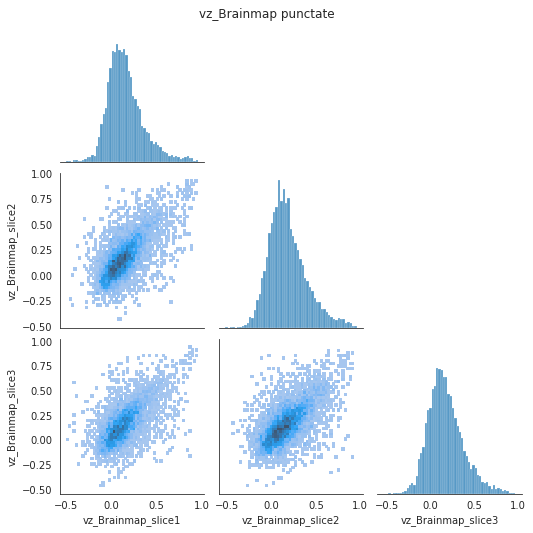

In [12]:
#Pairplots for experiments with replicate samples
#uses the gene/ont datasets for plotting

sns.set_style("white")

metrics = ['peripheral','central','radial','punctate']
experiment_samples = {
    'BICCN':['BICCN_mouse1','BICCN_mouse2'],
    'vz_Brainmap':['vz_Brainmap_slice1','vz_Brainmap_slice2','vz_Brainmap_slice3'],
    'vz_Liver':['vz_Liver_mouse1','vz_Liver_mouse2'],
}

stem = '../../nf_pipeline/outputs/SRRS_20220526/gene_ont'

for experiment,samples in experiment_samples.items():
    for metric in metrics:
        df = pd.DataFrame()
        for sample in samples:
            f_path = glob.glob(os.path.join(stem,sample)+'*'+metric+'*')
            if not f_path:
                continue
                
            sample_df = pd.read_csv(f_path[0])
            sample_df['sample'] = sample
            df = pd.concat((df,sample_df))
            
        if df.empty:
            continue
            
        #Pairplot
        sample_pair_df = df.pivot_table(
            index = ['gene','annotation'],
            columns = 'sample',
            values = 'med_score',
            aggfunc = 'median',
        )
        display(sample_pair_df.corr())

        fig = sns.pairplot(
            sample_pair_df,
            kind = 'hist',
            corner = True,
        )
        plt.suptitle('{} {}'.format(experiment,metric))
        plt.show()
        plt.close()
        

                    


# Pairplots for permuted datasets

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.000536
BICCN_mouse2,0.000536,1.000000


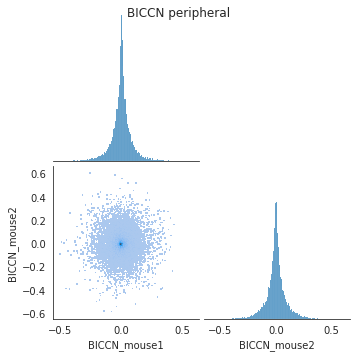

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.00000,-0.00823
BICCN_mouse2,-0.00823,1.00000


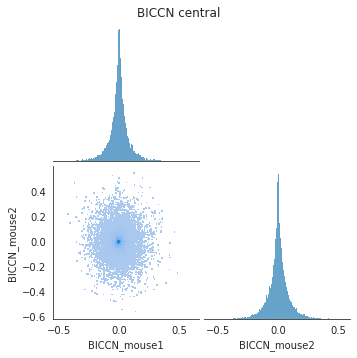

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.012207
BICCN_mouse2,0.012207,1.000000


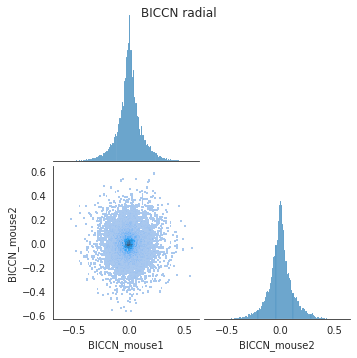

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,-0.017381
BICCN_mouse2,-0.017381,1.000000


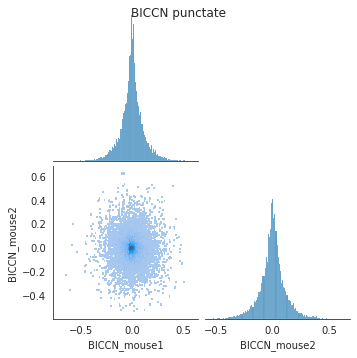

In [16]:
#Pairplots for experiments with replicate samples
#uses the gene/ont datasets for plotting

sns.set_style("white")

metrics = ['peripheral','central','radial','punctate']
experiment_samples = {
    'BICCN':['BICCN_mouse1','BICCN_mouse2'],
    'vz_Brainmap':['vz_Brainmap_slice1','vz_Brainmap_slice2','vz_Brainmap_slice3'],
}

stem = '../../nf_pipeline/outputs/SRRS_20220527_perm/gene_ont'

for experiment,samples in experiment_samples.items():
    for metric in metrics:
        df = pd.DataFrame()
        for sample in samples:
            f_path = glob.glob(os.path.join(stem,sample)+'*'+metric+'*')
            if not f_path:
                continue
                
            sample_df = pd.read_csv(f_path[0])
            sample_df['sample'] = sample
            df = pd.concat((df,sample_df))
            
        if df.empty:
            continue 
            
        #Pairplot
        sample_pair_df = df.pivot_table(
            index = ['gene','annotation'],
            columns = 'sample',
            values = 'med_score',
            aggfunc = 'median',
        )
        display(sample_pair_df.corr())

        fig = sns.pairplot(
            sample_pair_df,
            kind = 'hist',
            corner = True,
        )
        plt.suptitle('{} {}'.format(experiment,metric))
        plt.show()
        plt.close()
        

                    
